In [1]:
from skimage import io
from skimage.filters import threshold_otsu, threshold_multiotsu
import numpy as np
import matplotlib.pyplot as plt

(514, 652)


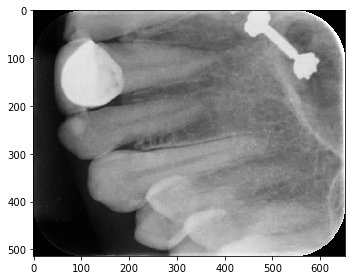

In [2]:
sample_img = io.imread('sample_data/images/2.jpg', as_gray=True)
print(np.shape(sample_img))
io.imshow(sample_img)

(array([10232.,  4096.,  2144.,  2900.,  2315.,  1215.,  2651.,  2753.,
         1415.,  2881.,  1350.,  2825.,  2605.,  1342.,  2731.,  2620.,
         1321.,  2207.,  1452.,   552.,   942.,   411.,   845.,   760.,
          437.,   808.,   748.,   335.,   618.,   552.,   219.,   384.,
          192.,   333.,   304.,   177.,   295.,   274.,   162.,   325.,
          362.,   211.,   448.,   253.,   487.,   502.,   274.,   683.,
          816.,   502.,  1115.,   600.,  1514.,  1709.,   897.,  2093.,
         2391.,  1306.,  2796.,  2938.,  1583.,  3208.,  1826.,  3846.,
         4315.,  2363.,  5217.,  5910.,  3113.,  6511.,  7006.,  3636.,
         7376.,  3703.,  7299.,  7355.,  3645.,  7334.,  7183.,  3608.,
         7092.,  6935.,  3335.,  6585.,  3147.,  6404.,  5924.,  2862.,
         5591.,  5105.,  2536.,  4761.,  4970.,  2446.,  4858.,  2357.,
         4762.,  4919.,  2294.,  4366.,  3893.,  1868.,  3519.,  1661.,
         3083.,  2995.,  1451.,  2773.,  2422.,  1148.,  2061., 

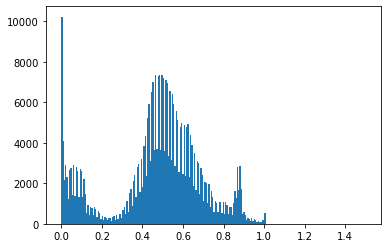

In [3]:
plt.hist(sample_img.flat, bins='auto', range=(0,1.5))

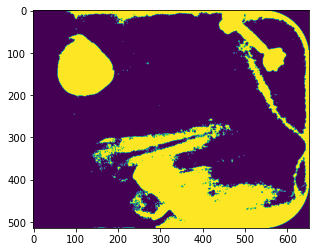

In [7]:
background = (sample_img <= 0.6)
img_data = (sample_img>0.6)
plt.imshow(img_data)

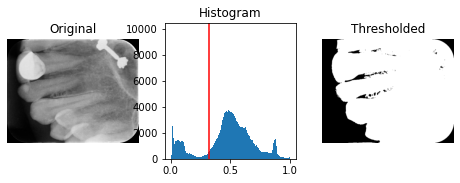

In [9]:
thresh = threshold_otsu(sample_img)
binary = sample_img > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(sample_img, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(sample_img.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

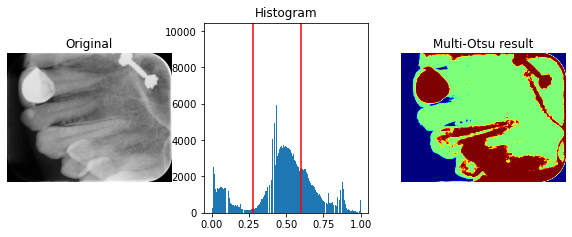

In [6]:
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(sample_img)

# Using the threshold values, we generate the three regions.
regions = np.digitize(sample_img, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(sample_img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(sample_img.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()